**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



In [42]:
vec_txt_region_label = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
lst = lapply(vec_txt_region_label, function(txt_region_label_A){
    ### set directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_closest",
        txt_region_label_A,
        "summary"
    )
    txt_fname = "region.summary.genome_tss.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    dat = read_tsv(txt_fpath)
    return(dat)
})
names(lst) = vec_txt_region_label
lst_dat_region_import = lst

Rows: 150042 Columns: 8
── Column specification ────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Chrom, Region, Annotation_A, Annotation_B, Label_TSS_Proximity
dbl (3): ChromStart, ChromEnd, Distance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 246852 Columns: 8
── Column specification ────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Chrom, Region, Annotation_A, Annotation_B, Label_TSS_Proximity
dbl (3): ChromStart, ChromEnd, Distance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [43]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
print(dim(dat))
print(length(dat$Region))
print(length(unique(dat$Region)))
head(dat)

[1] 150042      8
[1] 150042
[1] 150042


Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Distance,Label_TSS_Proximity
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,18966,Distal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,14757,Distal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,13033,Distal
chr1,17288,17689,chr1:17288-17689,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,11682,Distal
chr1,28934,29499,chr1:28934-29499,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,0,Proximal
chr1,115429,115969,chr1:115429-115969,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,86059,Distal


In [44]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
table(dat$Label_TSS_Proximity)


  Distal Proximal 
  138227    11815 

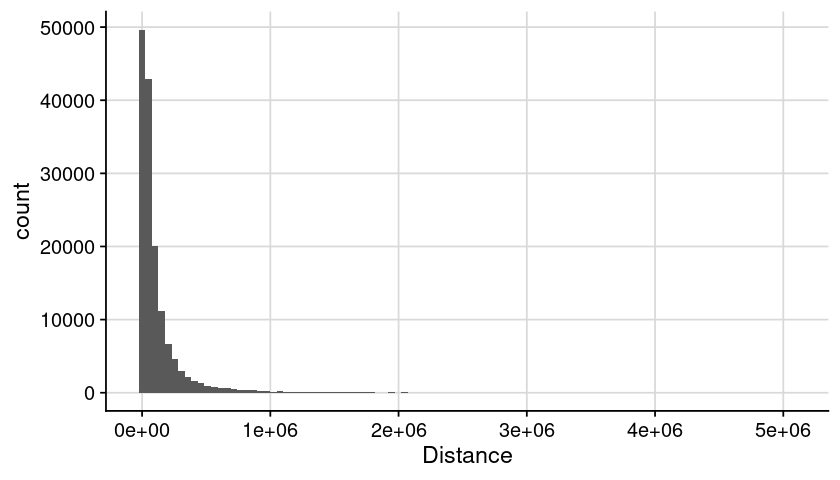

In [27]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]

gpt = ggplot(dat, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid()

options(repr.plot.height = 4, repr.plot.width = 7) 
print(gpt)

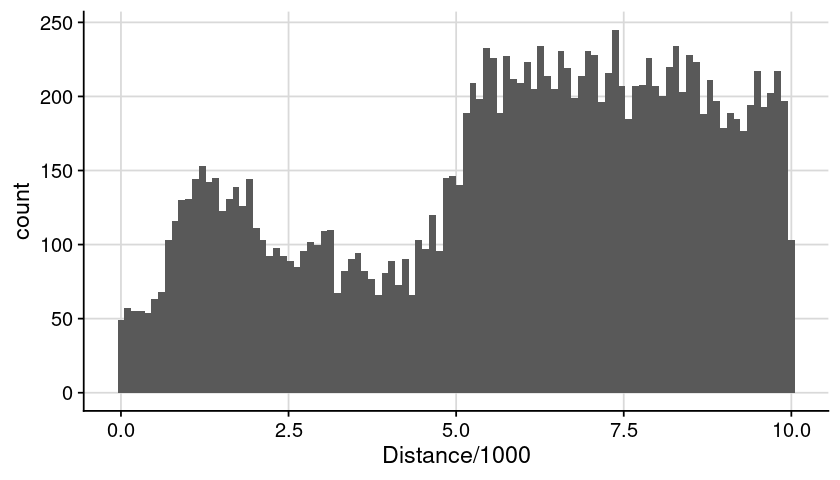

In [40]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::filter(Distance > 0, Distance < 10000)
gpt = ggplot(dat, aes(x=Distance/1000)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid()

options(repr.plot.height = 4, repr.plot.width = 7) 
print(gpt)

**Helper function to get the mode of a continuous variable**

In [56]:
get_mode_continuous <- function(x, ...) {
    obj = density(x, ...)
    num = obj$x[which.max(obj$y)]
    return(num)
}

In [62]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
vec = dat$Distance
get_mode_continuous(vec)

[1] 9452.466

In [64]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
vec = dat$Distance
sum(vec == 0)

[1] 9649

In [76]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
vec = dat$Distance
sum(vec <= 2000)

[1] 11815

In [63]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
tmp = dat %>% dplyr::filter(Distance > 0)
vec = tmp$Distance/1000
summary(vec)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.002   21.992   56.653  129.832  136.984 5069.859 

In [ ]:
tmp = dat

In [101]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Distance = Distance / 1000)

###
tmp = dat %>% dplyr::filter(Distance > 0, Distance <= 10)
gpt = ggplot(tmp, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid() +
     labs(
         x = "Distance (kb)",
         y = "Count",
         title = "Distance: >0-10kb"
     )

gp1 = gpt

###
txt_line1 = paste("Count (D == 0  }:", " 9.6K ")
txt_line2 = paste("Count (D <= 2kb}:", "11.8K ")
txt_line3 = paste("Mode ~", "9.5  kb ")
txt_line4 = paste("Max ~", "5.07 Mb ")
txt_annot = paste(txt_line1, txt_line2, txt_line3, txt_line4, sep = "\n")

###
#tmp = dat %>% dplyr::filter(Distance > 0, Distance <= 1000)
tmp = dat %>% dplyr::filter(Distance <= 1000)
gpt = ggplot(tmp, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid() +
     labs(
         x = "Distance (kb)",
         y = "Count",
         title = "Distance"
     ) +
     annotate(
        "label", 
         x = 500,
         y = 13000,
         label = txt_annot,
         fill  = "white",
         size  = 6,
         hjust = 0
     )
gp2 = gpt

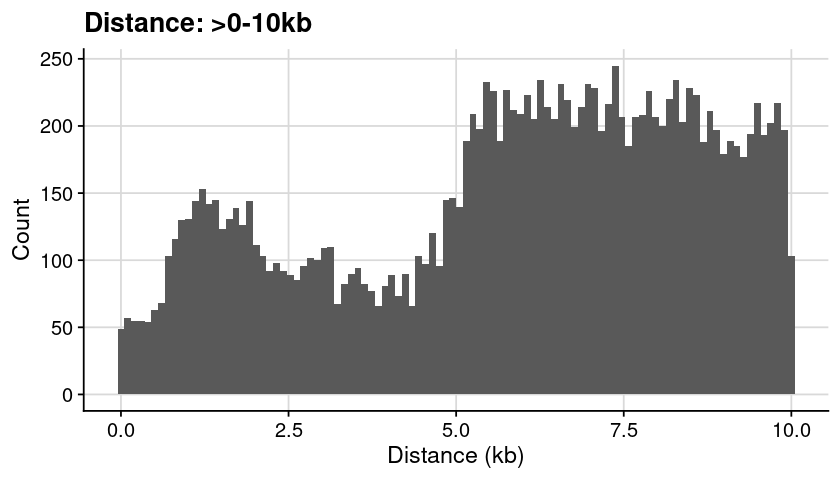

In [102]:
options(repr.plot.height = 4, repr.plot.width = 7) 
print(gp1)

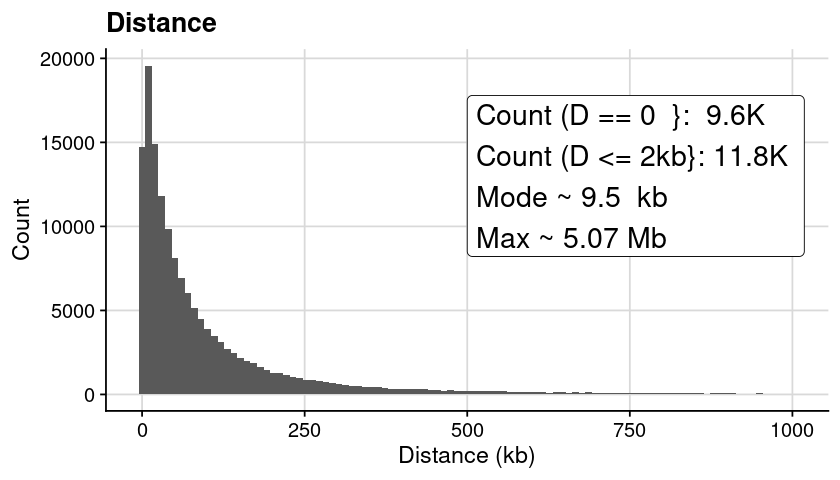

In [103]:
options(repr.plot.height = 4, repr.plot.width = 7) 
print(gp2)

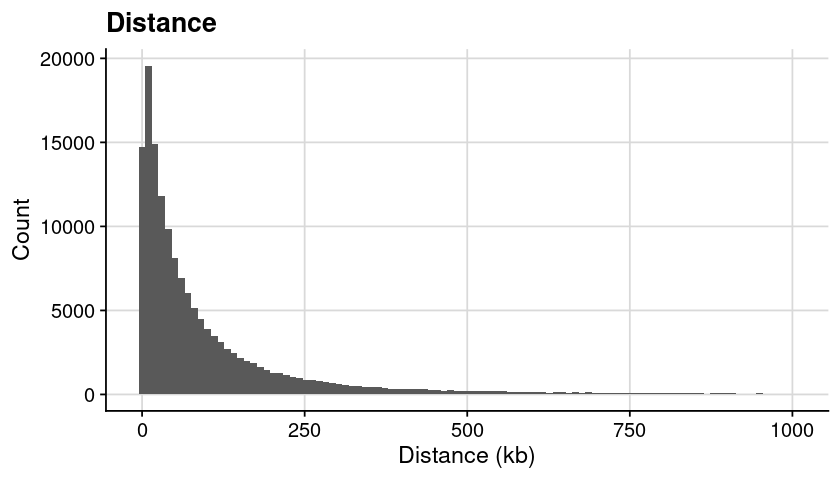

In [71]:
tmp = dat %>% dplyr::filter(Distance <= 1000)
gpt = ggplot(tmp, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid() +
     labs(
         x = "Distance (kb)",
         y = "Count",
         title = "Distance"
     ) 
print(gpt)

In [20]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>%
    dplyr::mutate(Distance = as.character(Distance)) %>%
    dplyr::group_by(Chrom, ChromStart, ChromEnd, Region) %>%
    dplyr::summarise(Count = n(), .groups = "drop")
                     
print(length(dat$Region))
print(length(unique(dat$Region)))
head(dat)

[1] 150042
[1] 150042


Chrom,ChromStart,ChromEnd,Region,Count
<chr>,<dbl>,<dbl>,<chr>,<int>
chr1,10038,10405,chr1:10038-10405,1
chr1,14282,14614,chr1:14282-14614,1
chr1,16025,16338,chr1:16025-16338,1
chr1,17288,17689,chr1:17288-17689,1
chr1,28934,29499,chr1:28934-29499,1
chr1,115429,115969,chr1:115429-115969,1


In [21]:
dat %>% dplyr::filter(Count > 1) %>% head

Chrom,ChromStart,ChromEnd,Region,Count
<chr>,<dbl>,<dbl>,<chr>,<int>
chr1,826796,828040,chr1:826796-828040,2
chr1,1231026,1232697,chr1:1231026-1232697,2
chr1,1307484,1309889,chr1:1307484-1309889,2
chr1,1324275,1325765,chr1:1324275-1325765,2
chr1,1398925,1400412,chr1:1398925-1400412,2
chr1,2391045,2392376,chr1:2391045-2392376,2


In [22]:
lst = lst_dat_region_import
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat %>% dplyr::filter(Region == "chr1:826796-828040")

Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Region_TSS,Label_Gene,Count_Gene,Distance,Label_Proximity
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
chr1,826796,828040,chr1:826796-828040,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,chr1:827522-827523,LINC00115,1,0,Proximal
chr1,826796,828040,chr1:826796-828040,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,chr1:827590-827591,LINC01128,1,0,Proximal
